<a target="_blank" href="https://colab.research.google.com/github/rcabanasdepaz/ME-BigData/blob/main/ImportanceSampling/RegLineal.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Regresión lineal con modelos jerárquicos

A continuación se muestra cómo aprender los pesos de una regresión lineal utilizando un modelo probabilístico jerárquico.

## Conjunto de datos

En primer lugar, muestreamos un conjunto de datos $\{x_i,y_i\}_{i=1}^{1000}$ siguiendo la expresión $y_i = 2x_i + 3 + \varepsilon_i$ con $\varepsilon_i\sim \mathcal{N}(0,1)$.

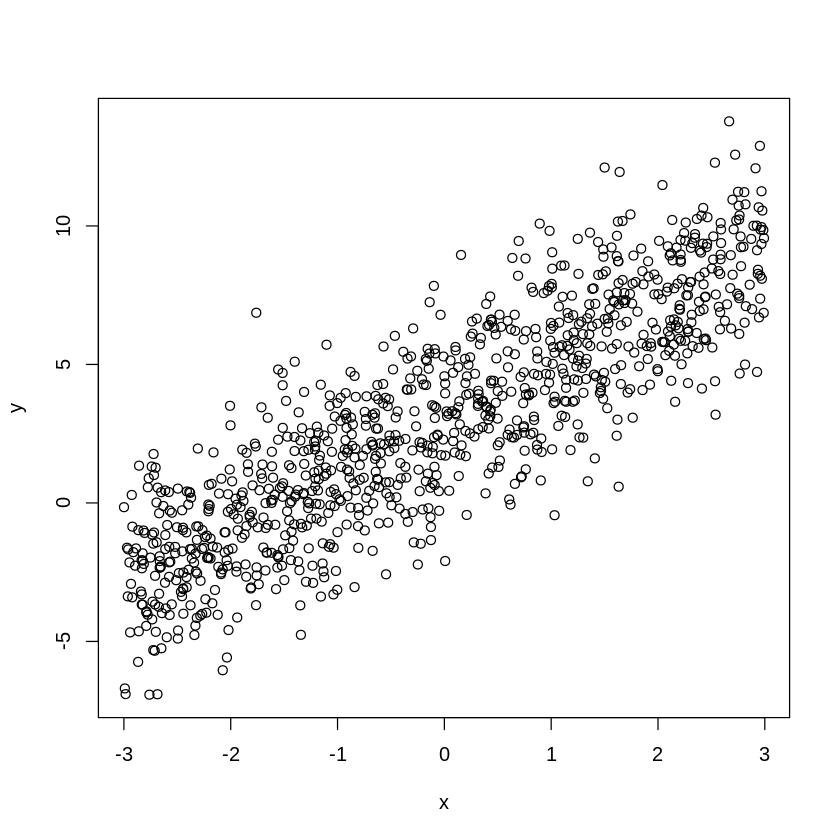

In [17]:
n=1000
x = runif(n,-3,3)
y = 2*x + 3 + rnorm(n,0,2)
plot(x,y)


## Mínimos cuadrados

En primer lugar, es posible utilizar el método tradicional de mínimos cuadrados. Además, podemos comprobar el resultado con distintos tamaños para los datos.

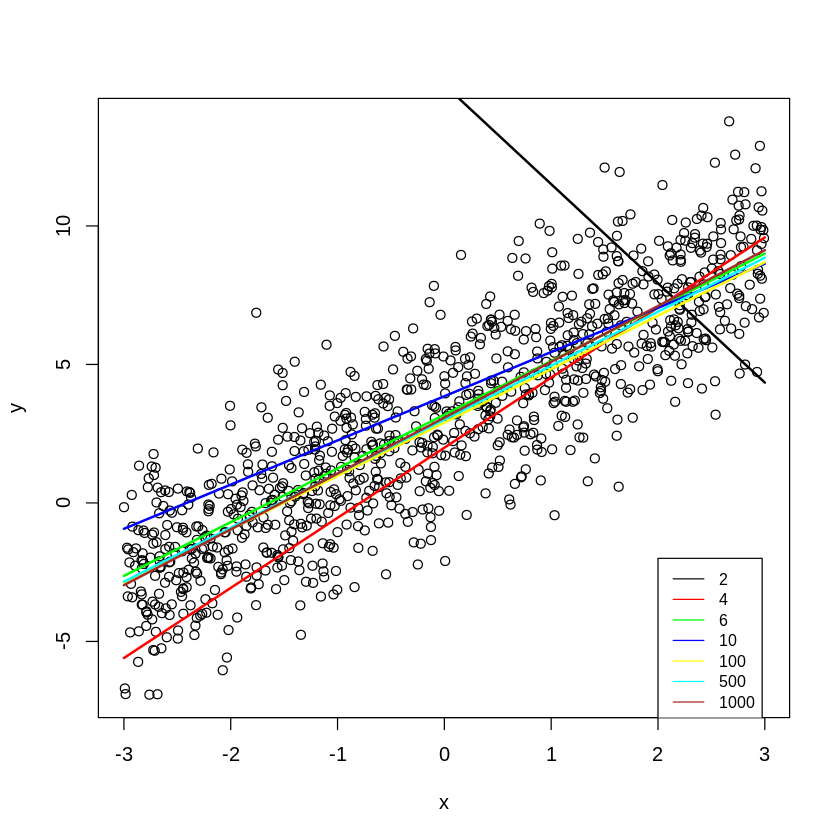

In [18]:

plot(x,y)

t = c(2,4,6,10,100,500,1000)
co = c("black","red","green","blue","yellow","cyan","brown")

for (i in 1:length(t)) {
  x_parcial = x[1:t[i]]
  y_parcial = y[1:t[i]]
  m = lm(y_parcial~x_parcial)
  a = m$coefficients[1]
  b = m$coefficients[2]
  y_estimado = a + b * x
  curve(a+b*x,-3,3, lwd=2.0, add=T,col=co[i])
}
legend(2,-2, legend= t, col=co,lty=1, cex=0.8)


## Modelo

El una regresión lineal se puede definir como el siguiente modelo jerárquico.


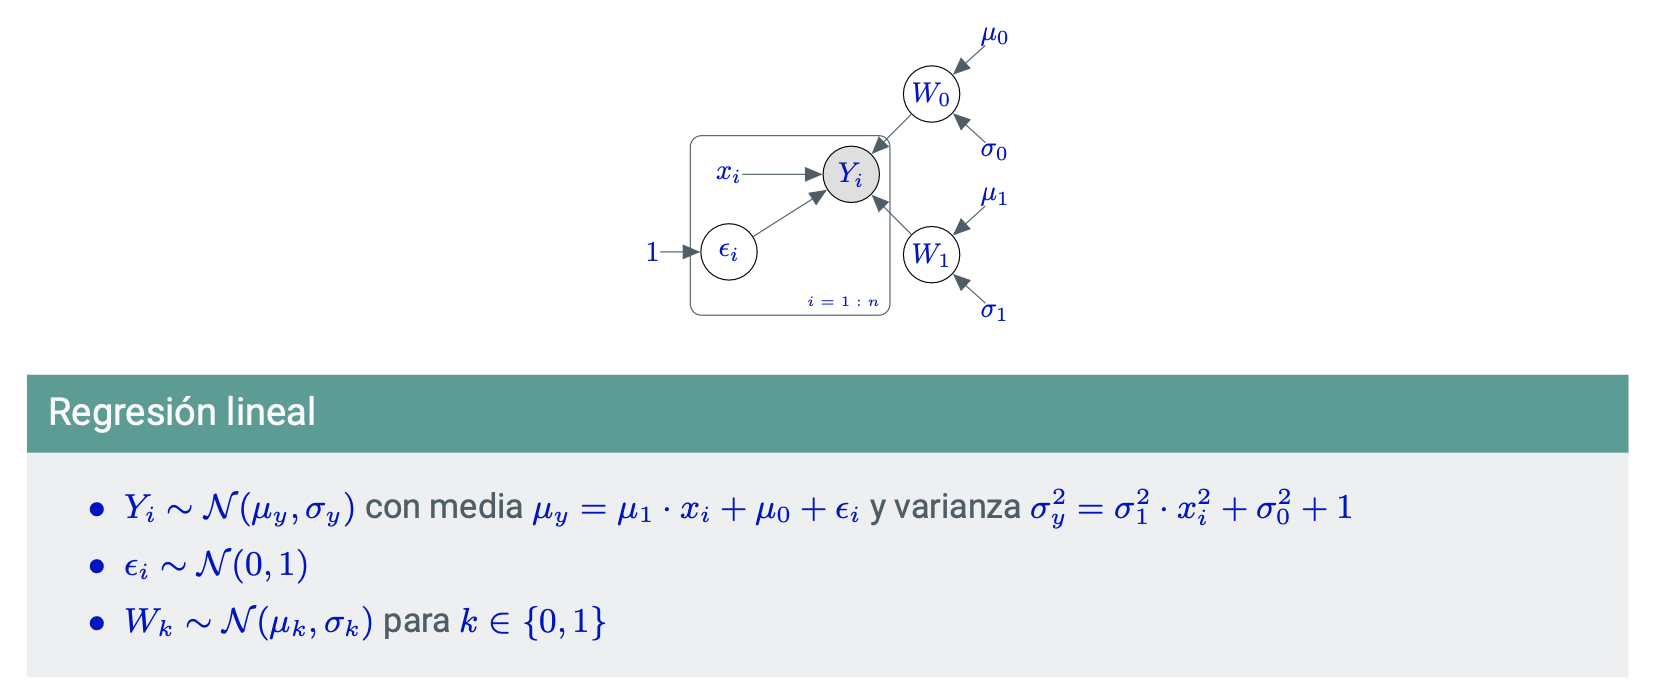




Podemos definir el modelo como una función que devuelve $K$ muestras, a partir de una muestra $x$ y de los hiperparámetros.

In [19]:
reg_lineal <- function(mu0,sd0,mu1,sd1,x,K){
  w0 = rnorm(K,mu0,sd0)
  w1 = rnorm(K,mu1,sd1)
  y = w0 + x*w1
  s_epsilon = rnorm(K)
  list(w0=w0,w1=w1,x=x,y=y,epsilon=s_epsilon)
}

reg_lineal(mu0=3,sd0=0.5,mu1=2,sd1=0.5,x[1], K=3)


$w0
[1] 3.736274 2.874813 2.604513

$w1
[1] 1.775125 2.716682 2.164717

$x
[1] 2.316292

$y
[1] 7.847980 9.167440 7.618629

$epsilon
[1] -0.7536081 -1.2892298  1.0429229

## Inferencia

A continuación se ajustan los parámetros de la regresión utilizando muestreo por importancia.


In [20]:


# A priori de w0, N(mu0,sigma = sd0)
mu0 = 0
sd0 = 1
# A priori de w1, N(mu1,sgima = sd1)
mu1 = 0
sd1 = 1

# Parámetros de la inferencia (muestreo por importancia)
K=50000         # número de muestras
M = 500     # número de iteraciones
i=1
for (i in 1:M) {


  # Genera las muestras
  s = reg_lineal(mu0,sd0,mu1,sd1,x[i], K)

  s_w0 = s$w0
  s_w1 = s$w1
  s_epsilon = s$epsilon

  var_yi = sd0^2+sd1^2*x[i]^2 + 1

  p = dnorm(s_w0,mu0,sd0) * dnorm(s_w1,mu1,sd1) * dnorm(y[i],s_w0+s_w1*x[i]+s_epsilon,sqrt(var_yi))
  p_star = dnorm(s_w0,mu0,sd0) * dnorm(s_w1,mu1,sd1)
  weights = p / p_star
  sum_weights = sum(weights)

  est_w0 = 1/sum_weights*sum(weights*s_w0)
  est_w0_2 = 1/sum_weights*sum(weights*s_w0^2)
  mu0 = est_w0
  sd0 = sqrt(est_w0_2-est_w0^2)

  est_w1 = 1/sum_weights*sum(weights*s_w1)
  est_w1_2 = 1/sum_weights*sum(weights*s_w1^2)
  mu1 = est_w1
  sd1 = sqrt(est_w1_2-est_w1^2)


  if(i%%5==0){
    cat('Data item no.: ',i,'\n')
    cat('mu0=',mu0,' ; sd0=',sd0,'\n')
    cat('mu1=',mu1,' ; sd1=',sd1,'\n')
  }
}


Data item no.:  5 
mu0= 1.824708  ; sd0= 0.6957446 
mu1= 2.332377  ; sd1= 0.6037833 
Data item no.:  10 
mu0= 3.083216  ; sd0= 0.5214235 
mu1= 1.477021  ; sd1= 0.4258777 
Data item no.:  15 
mu0= 2.641316  ; sd0= 0.4389698 
mu1= 1.689194  ; sd1= 0.300665 
Data item no.:  20 
mu0= 3.191864  ; sd0= 0.3785963 
mu1= 1.673614  ; sd1= 0.2390918 
Data item no.:  25 
mu0= 2.963157  ; sd0= 0.3328729 
mu1= 1.802281  ; sd1= 0.2126755 
Data item no.:  30 
mu0= 3.012865  ; sd0= 0.2965134 
mu1= 1.761483  ; sd1= 0.2075802 
Data item no.:  35 
mu0= 2.851454  ; sd0= 0.2634992 
mu1= 1.633026  ; sd1= 0.1885108 
Data item no.:  40 
mu0= 2.988114  ; sd0= 0.2457501 
mu1= 1.733023  ; sd1= 0.1698473 
Data item no.:  45 
mu0= 3.00832  ; sd0= 0.2326987 
mu1= 1.808185  ; sd1= 0.1555742 
Data item no.:  50 
mu0= 2.967954  ; sd0= 0.2196059 
mu1= 1.840412  ; sd1= 0.141435 
Data item no.:  55 
mu0= 2.745622  ; sd0= 0.2088182 
mu1= 1.831537  ; sd1= 0.1287016 
Data item no.:  60 
mu0= 2.772848  ; sd0= 0.2002919 
mu1= 

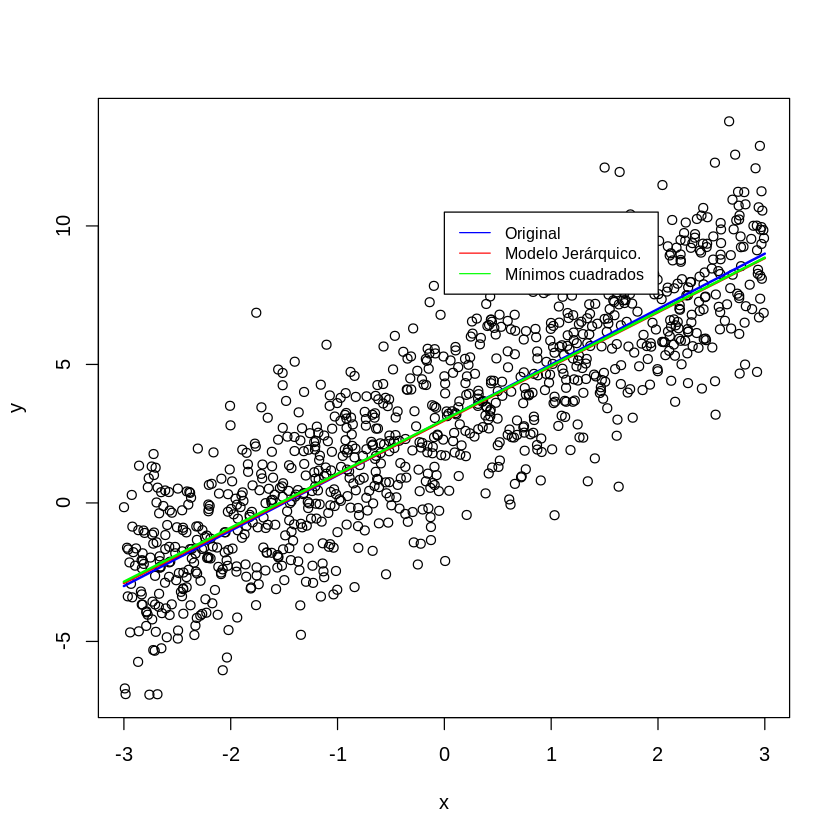

In [21]:
plot(x,y)
curve(2*x+3, from = -3, to = 3, add=T, col = 'blue', lwd=2)
curve(mu1*x+mu0, from = -3, to = 3, add=T, col = 'red', lwd=2)
linM = lm(y[1:M]~x[1:M])
curve(linM$coefficients[1]+linM$coefficients[2]*x, from = -3, to = 3, add=T, col = 'green', lwd=2)
legend(0, 10.5, legend= c('Original','Modelo Jerárquico.','Mínimos cuadrados'), col=c('blue','red','green'),lty=1, cex=0.8)



## Enlaces
- Para crear notebooks con código en R: https://colab.research.google.com/#create=true&language=r